<a href="https://colab.research.google.com/github/PKRaj007/PKRaj007/blob/main/FER_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 8.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pathlib import Path
from tensorboardX import SummaryWriter
from torchvision import datasets, transforms, models
from tqdm import tqdm

writer = SummaryWriter()
sns.set()
sns.set_style("dark")
sns.set_palette("muted")
sns.set_color_codes("muted")

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LOADER_KWARGS = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {'num_workers': 4}
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: True


**The five steps in the life-cycle are as follows:

1. Prepare the Data.
2. Define the Model.
3. Train the Model.
4. Evaluate the Model.
5. Make Predictions.
**

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from matplotlib import pyplot
import os
import cv2
import torch
import torch
import numpy as np_utils
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

**# define location to save or load the dataset**

WE CAN ALSO CHECK IT ON CK+ DATASET....
https://www.kaggle.com/datasets/shawon10/ckplus

In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

dataset = ImageFolder('/content/drive/MyDrive/OPA datasets/FED-RO-20221121T095918Z-001/FED-RO', transform=Compose([Resize((64,64)),ToTensor()]))
print(len(dataset))
datasets = train_val_dataset(dataset)
print(len(datasets['train']))
print(len(datasets['val']))
# The original dataset is available in the Subset class
print(datasets['train'].dataset)

dataloaders = {x:DataLoader(datasets[x],32, shuffle=True, num_workers=2) for x in ['train','val']}
x_train,y_train = next(iter(dataloaders['train']))
x_val,y_val = next(iter(dataloaders['val']))
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

400
300
100
Dataset ImageFolder
    Number of datapoints: 400
    Root location: /content/drive/MyDrive/OPA datasets/FED-RO-20221121T095918Z-001/FED-RO
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
torch.Size([32, 3, 64, 64]) torch.Size([32])
torch.Size([32, 3, 64, 64]) torch.Size([32])


Label : 0


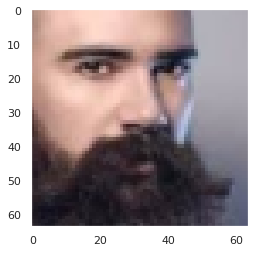

In [ ]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [ ]:
num_classes = 7

In [ ]:
print("Follwing classes are there : \n",dataset.classes)

Follwing classes are there : 
 ['0', '1', '2', '3', '4', '5', '6']


**# define the transforms to apply to the data**

In [ ]:
trans = Compose([ToTensor()])

In [ ]:
len(dataloaders)

2

In [ ]:
len(dataloaders['train'])

10

In [ ]:
len(dataloaders['val'])

4

In [ ]:
len(x_train)

32

In [ ]:
len(y_train)

32

In [ ]:
len(x_val)

32

In [ ]:
len(y_val)

32

Feature batch shape: torch.Size([3, 64, 64])
Labels batch shape: torch.Size([])


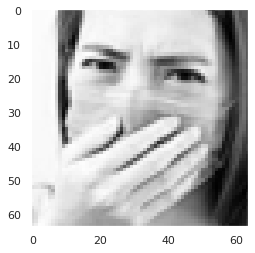

Label: 2


In [ ]:
# Display image and label.
train_features = next(iter(x_train))
train_labels=next(iter(y_train))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

<ipython-input-19-71ee54377e67>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize = (2,2))


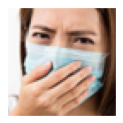

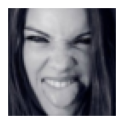

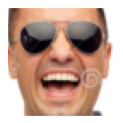

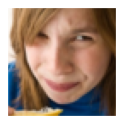

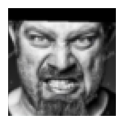

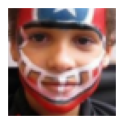

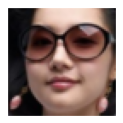

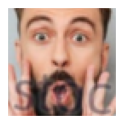

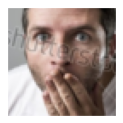

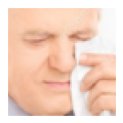

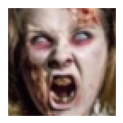

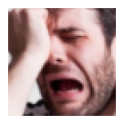

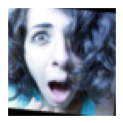

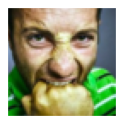

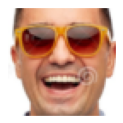

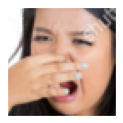

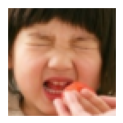

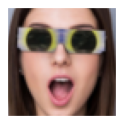

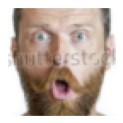

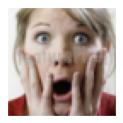

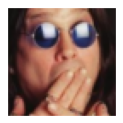

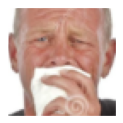

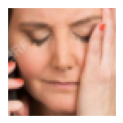

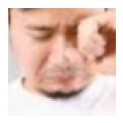

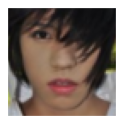

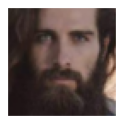

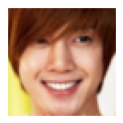

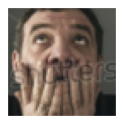

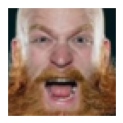

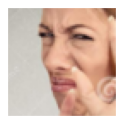

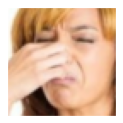

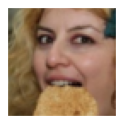

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for i in range(len(x_train)):
        images=x_train[i]
        labels=y_train[i]
        fig,ax = plt.subplots(figsize = (2,2))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        
        
show_batch(x_train)

**Model formation..**

In [ ]:
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import accuracy_score
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
from torch.utils.data import DataLoader
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torchvision import models
from torchsummary import summary


In [ ]:
class FER(nn.Module):
    def __init__(self):
        super(FER,self).__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3,64, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 5, stride = 1, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),

            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            # nn.AdaptiveMaxPool2d(256,return_indices=False),
            nn.Linear(2304,512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256,7)
            # nn.Softmax(dim=1)
        )
        self.activation=nn.LogSoftmax(dim=1)
    
    def forward(self, xb):
        # torch.unsqueeze(xb,dim=2)
        A=self.network(xb)
        return self.activation(A)

In [ ]:
# PATH="/content/drive/MyDrive/trained model/MODEL.pt"
# torch.save(model.state_dict(), PATH)

In [ ]:
PATH="/content/drive/MyDrive/trainedmodel/model.pth"
# model=FER
model = torch.load(PATH)
model.eval()

FER(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [ ]:
def test(epoch=None, is_validation=False):
    model.eval()
    loader = dataloaders['val'] if is_validation else dataloaders['train']
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(dataloaders['val']):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            test_loss += F.cross_entropy(outputs, targets, size_average=False).item()
            test_correct += outputs.max(1)[1].eq(targets).sum().item()
            # print("test_correct",test_correct)
    if is_validation:
        writer.add_scalar('logs/val_loss', test_loss/len(datasets['val']), epoch)
        writer.add_scalar('logs/val_acc', test_correct/len(datasets['val']), epoch)
    else:
        print("Test Accuracy: {}/{}".format(test_correct, len(datasets['val'])))

In [ ]:
test()

Test Accuracy: 81/100


/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
model=FER()
dev=torch.device("cuda")
model.to(dev)
print(model)

FER(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [ ]:
# torch.save(model.state_dict(), PATH)

In [ ]:
# model = FER() # *args, **kwargs
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
def test(epoch=None, is_validation=False):
    model.eval()
    loader = dataloaders['val'] if is_validation else dataloaders['train']
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(dataloaders['val']):
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            test_loss += F.cross_entropy(outputs, targets, size_average=False).item()
            test_correct += outputs.max(1)[1].eq(targets).sum().item()
            # print("test_correct",test_correct)
    if is_validation:
        writer.add_scalar('logs/val_loss', test_loss/len(datasets['val']), epoch)
        writer.add_scalar('logs/val_acc', test_correct/len(datasets['val']), epoch)
    else:
        print("Test Accuracy: {}/{}".format(test_correct, len(datasets['val'])))

In [ ]:
test()

In [ ]:
len(datasets['val'])

100

In [ ]:
len(datasets['train'])

300

In [ ]:
len(dataloaders['train'])

10

In [ ]:
len(dataloaders['val'])

4

In [ ]:
optimizer = optim.Adam(model.parameters())

# Training
def train(epoch):
    model.train()
    epoch_loss = 0
    epoch_correct = 0
    for batch_idx, (inputs, targets) in enumerate(tqdm(dataloaders['train'])):
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()
        batch_correct = outputs.max(1)[1].eq(targets).sum().item()
        epoch_loss += loss.item()
        epoch_correct += batch_correct
        writer.add_scalar('logs/train_loss', loss.item(), epoch*len(dataloaders['train']) + batch_idx)
        writer.add_scalar('logs/train_acc', batch_correct / targets.size(0), epoch*len(dataloaders['train']) + batch_idx)
    test(epoch, is_validation=True)

In [ ]:
TRAIN_EPOCHS = 20
WEIGHTS_PATH = Path("./vgg_cifar_weights.pt")

if WEIGHTS_PATH.is_file():
    model.load_state_dict(torch.load(WEIGHTS_PATH))
    print("Loaded weights from file:", WEIGHTS_PATH)
else:
    for epoch in range(TRAIN_EPOCHS):
        train(epoch)
    torch.save(model.state_dict(), WEIGHTS_PATH)

100%|██████████| 10/10 [00:01<00:00,  9.79it/s]


In [ ]:
test()

Test Accuracy: 33/100


In [ ]:
same_label = []

In [ ]:
FER_LABELS=dataset.classes
print("Face emage recognition classes",FER_LABELS)

Face emage recognition classes ['0', '1', '2', '3', '4', '5', '6']


In [ ]:
def predict(model, test_img, test_label, FER_LABELS):
    model.eval()
    with torch.no_grad():
        predictions = model(test_img)
        # Tensor (1, 10) -> [ [0.1, 0.01, ..., 0.6] ]
        predicted_index = predictions.argmax(1)
        for i in range(len(predicted_index)):
            predicted = FER_LABELS[predicted_index[i]]
            expected = FER_LABELS[test_label[i]]
            if predicted == expected:
                tmp = []
                tmp.append(test_img[i])
                tmp.append(test_label[i])
                same_label.append(test_img[i].cpu())
                same_label.append(test_label[i].cpu())
            # print(predicted,expected)
    return predicted, expected

In [ ]:
len(dataloaders['val']) # toral batches...

4

In [ ]:
inputs, classes = next(iter(dataloaders['val']))
print("inputs",len(inputs)) # total images in one batch
print("classes",len(classes))

inputs 32
classes 32


In [ ]:
for test_img, test_label in dataloaders['val']:
    #test_img, test_label = test_set[i]
    predicted, expected = predict(model, test_img.to(DEVICE), test_label.to(DEVICE) ,FER_LABELS)

In [ ]:
print(same_label[0])
print(len(same_label))

tensor([[[0.0235, 0.0235, 0.0235,  ..., 0.2980, 0.2431, 0.2588],
         [0.0275, 0.0235, 0.0235,  ..., 0.2941, 0.2627, 0.2431],
         [0.0314, 0.0235, 0.0235,  ..., 0.3216, 0.2824, 0.2627],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.3529, 0.1647, 0.2118],
         [0.0039, 0.0039, 0.0039,  ..., 0.6627, 0.2863, 0.2235],
         [0.0039, 0.0039, 0.0000,  ..., 0.8275, 0.5569, 0.2863]],

        [[0.0549, 0.0549, 0.0549,  ..., 0.2902, 0.2431, 0.2627],
         [0.0588, 0.0549, 0.0549,  ..., 0.2784, 0.2588, 0.2431],
         [0.0627, 0.0549, 0.0549,  ..., 0.3020, 0.2745, 0.2549],
         ...,
         [0.0510, 0.0510, 0.0510,  ..., 0.3216, 0.1490, 0.1922],
         [0.0510, 0.0510, 0.0510,  ..., 0.6000, 0.2353, 0.1765],
         [0.0510, 0.0510, 0.0471,  ..., 0.7412, 0.4824, 0.2157]],

        [[0.0980, 0.0980, 0.0980,  ..., 0.3020, 0.2706, 0.2980],
         [0.1020, 0.0980, 0.0980,  ..., 0.2902, 0.2863, 0.2784],
         [0.1059, 0.0980, 0.0980,  ..., 0.3059, 0.2941, 0.

In [ ]:
# # model definition
# class FER_MODEL(Module):
#     # define model elements
#     def __init__(self, n_channels):
#         super(FER_MODEL, self).__init__()
#         # input to first hidden layer
#         self.hidden1 = Conv2d( n_channels, 64, (3,3))
#         kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
#         self.conv1_bn=nn.BatchNorm2d(64)
#         self.act1 = ReLU()
#         # first pooling layer
#         self.pool1 = MaxPool2d((2,2), stride=(2,2))
#         # second hidden layer
#         self.hidden2 = Conv2d(64,128, (5,5))
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
#         self.conv2_bn=nn.BatchNorm2d(128)
#         self.act2 = ReLU()
#         # second pooling layer
#         self.pool2 = MaxPool2d((2,2), stride=(2,2))
#         # third hidden layer
#         self.hidden3 = Conv2d(128,256, (3,3))
#         kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
#         self.conv3_bn=nn.BatchNorm2d(256)
#         self.act3 = ReLU()
#         # third pooling layer
#         self.pool3 = MaxPool2d((2,2), stride=(2,2))
#         # fourth hidden layer
#         self.hidden4 = Conv2d(256,256, (3,3))
#         kaiming_uniform_(self.hidden4.weight, nonlinearity='relu')
#         self.conv4_bn=nn.BatchNorm2d(256)
#         self.act4 = ReLU()
#         # third pooling layer
#         self.pool4 = MaxPool2d((2,2), stride=(2,2))
        
#         # fully connected layer
#         self.hidden5 = Linear(256,512)
#         kaiming_uniform_(self.hidden5.weight, nonlinearity='relu')
#         self.act5 = ReLU()

#         # output layer
#         self.hidden6 = Linear(256, 7)
#         xavier_uniform_(self.hidden6.weight)
#         self.act6 = Softmax(dim=1)
 
#     # forward propagate input
#     def forward(self, X):
#         # input to first hidden layer
#         X = self.hidden1(X)
#         X=F.relu(self.conv1_bn(X))
#         X = self.act1(X)
#         X = self.pool1(X)
#         # second hidden layer
#         X = self.hidden2(X)
#         X=F.relu(self.conv2_bn(X))
#         X = self.act2(X)
#         X = self.pool2(X)
#         # third hidden layer
#         X = self.hidden3(X)
#         X=F.relu(self.conv3_bn(X))
#         X = self.act3(X)
#         X = self.pool3(X)
#         # fourth hidden layer
#         X = self.hidden4(X)
#         X=F.relu(self.conv4_bn(X))
#         X = self.act4(X)
#         X = self.pool4(X)
#         # flatten
#         X = X.view(-1, 512)
#         # fifth hidden layer
#         X = self.hidden5(X)
#         X = self.act5(X)
#         # output layer
#         X = self.hidden6(X)
#         X = self.act6(X)
#         return X
 
